## Explorating GLOTREC catalogue 
#### [Gimena del Rio](gdelrio.riande@gmail.com) & [Romina De León](rdeleon@conicet.gov.ar) 
#### ([HDLAB CONICET](https://hdlab.space/))
#### Designed and maintained by Romina De León

## Goals:

- Cleaning of GLOTREC data related to Argentine Textbooks
- Download data from the GLOTREC repository
- Exporting of the date in a Jupyter Notebook
- Exploring data related to
    - authors and editorial houses
    - editorial houses and disciplines
    - editorial houses and collections
- Work on similar visualizations as the ones that can be found nowadays in GLOTREC, though improved with a focus on specific periods.

### Libraries to use

In [5]:
!pip install openpyxl

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import re

In [102]:
# Read the Excel file
df = pd.read_excel('data/itbc_export_2025.xlsx')

# Display basic information about the dataframe
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  335 non-null    object
 1   Call Number         332 non-null    object
 2   GLOTREC|Cat Link    335 non-null    object
 3   Catalogue           335 non-null    object
 4   Library Catalogue   335 non-null    object
 5   Year                335 non-null    int64 
 6   Publisher           335 non-null    object
 7   Place               335 non-null    object
 8   Title               335 non-null    object
 9   Authors             321 non-null    object
 10  Pages               333 non-null    object
 11  Format              335 non-null    object
 12  School Subject      335 non-null    object
 13  Level of Education  335 non-null    object
 14  Document Type       335 non-null    object
 15  Country of Use      335 non-null    object
dtypes: int64(1), object(15)
me

,ID,Call Number,GLOTREC|Cat Link,Catalogue,Library Catalogue,Year,Publisher,Place,Title,Authors,Pages,Format,School Subject,Level of Education,Document Type,Country of Use
0,1026966108,"RA G-26(2,2016)1",gei1026966108,GEI,PPN=1026966108,2013,A-Z editora,Ciudad Autónoma de Buenos Aires,Geografía de la Argentina María Julia Echeverr...,"Echeverría, María Julia | Capuz, Silvia María","276 Seiten Illustrationen, Diagramme, Karten",Book,Geography,ISCED 3 - Upper secondary level,Textbook,Argentina
1,1026966620,"RA G-26(2,2016)4",gei1026966620,GEI,PPN=1026966620,2013,A-Z editora,Ciudad Autónoma de Buenos Aires,Geografía del mundo actual María Julia Echever...,"Echeverría, María Julia | Capuz, Silvia María","300 Seiten Illustrationen, Diagramme, Karten",Book,Geography,ISCED 3 - Upper secondary level,Textbook,Argentina
2,1026966876,"RA G-26(2,2014)5",gei1026966876,GEI,PPN=1026966876,2013,A-Z editora,Ciudad Autónoma de Buenos Aires,Geografía social y económico de la Argentina M...,"Echeverría, María Julia | Capuz, Silvia María","272 Seiten Illustrationen, Diagramme, Karten",Book,Geography,ISCED 3 - Upper secondary level,Textbook,Argentina
3,102697254X,"RA G-27(13,2016)1",gei102697254X,GEI,PPN=102697254X,2008,A-Z editora,Ciudad Autónoma de Buenos Aires,Geografía - América y Antártida Horacio N. Lor...,"Lorenzini, Horacio N. | Balmaceda, Raúl Rey | ...","222 Seiten Illustrationen, Diagramme, Karten",Book,Geography,ISCED 3 - Upper secondary level,Textbook,Argentina
4,1026973066,"RA G-27(11,2016)2",gei1026973066,GEI,PPN=1026973066,2006,A-Z editora,Ciudad Autónoma de Buenos Aires,Geografía - Europa y Oceanía Horacio N. Lorenz...,"Lorenzini, Horacio N. | Balmaceda, Raúl Rey | ...","258 Seiten Illustrationen, Diagramme, Karten",Book,Geography,ISCED 3 - Upper secondary level,Textbook,Argentina


C:\Users\Adm\AppData\Local\Temp\ipykernel_11448\2741444262.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.values, y=conteo.index, palette="viridis")


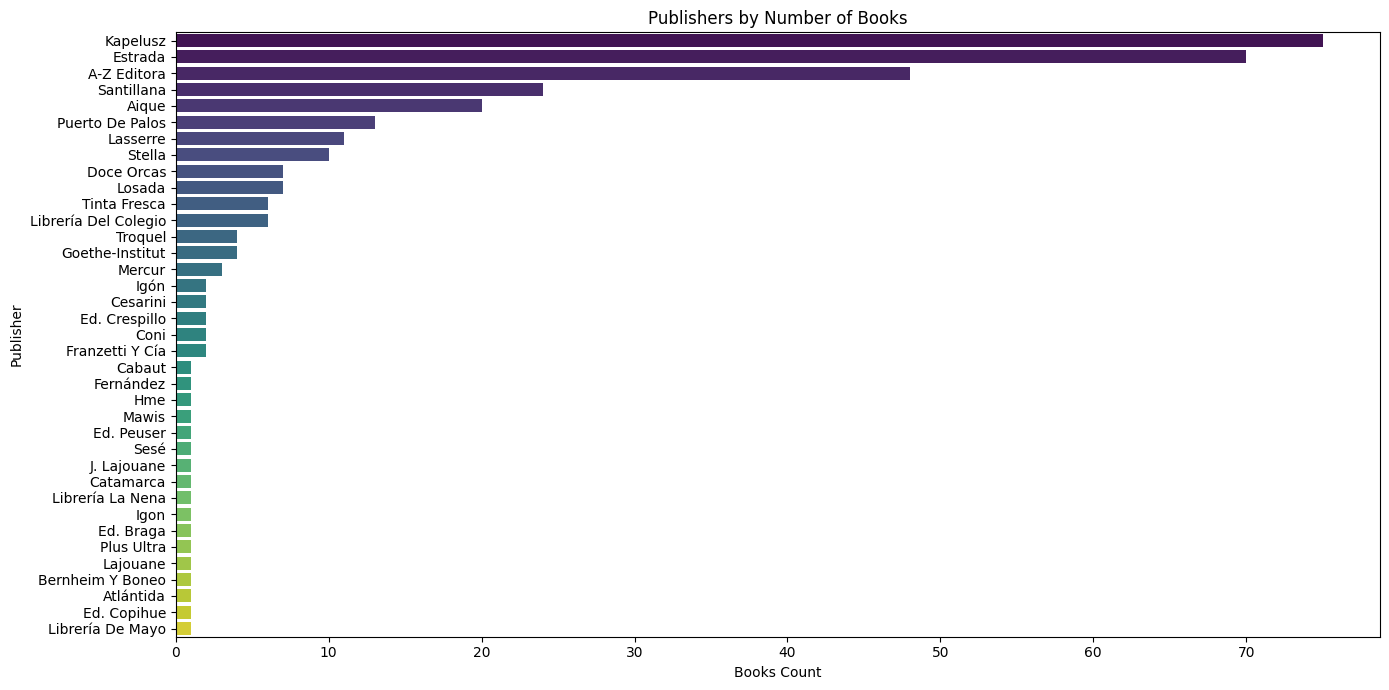

In [103]:
# Primero limpiamos espacios y pasamos todo a minúsculas para comparar mejor
df['Publisher'] = df['Publisher'].str.strip().str.lower()

# Diccionario de normalización
mapa_editoriales = {
    'a-z editora': 'A-Z Editora',
    'a-z ed.': 'A-Z Editora',
    'az editora': 'A-Z Editora',
    'estrada': 'Estrada',
    'estrada secundaria': 'Estrada',
    'angel estrada & cía.s.a.-editores': 'Estrada',
    'puerto de palos s.a. casa de édiciones': 'Puerto de Palos',
    'puerto de palos': 'Puerto de Palos',
    'aique primaria': 'Aique',
    'aique secundaria': 'Aique',
    'aique': 'Aique',
    'kapelusz': 'Kapelusz',
    'ed. kapelusz': 'Kapelusz',
    'kapelusz norma': 'Kapelusz',
    'tinta fresca': 'Tinta Fresca',
    'doce orcas ediciones': 'Doce Orcas',
    'doce orcas ed.': 'Doce Orcas',
    'doce orcas': 'Doce Orcas',
    'ed. stella': 'Stella',
    'ed. atlántida': 'Atlántida',
    'losada': 'Losada',
    'ed. troquel': 'Troquel',
    'imprenta mercur': 'Mercur',
    'imprenta de pablo e. coni, especial para obras': 'Coni',
    'coni': 'Coni',
    'goethe-inst.': 'Goethe-Institut',
    'cesarini': 'Cesarini',
    'cesarini hnos. ed.': 'Cesarini',
    'producciones mawis': 'Mawis',
    'editorial h.m.e.': 'HME',
    'imprenta y librería de mayo': 'Librería de Mayo',
    'librería del colegio, alsina y bolívar': 'Librería del Colegio',
    'cabaut, librería del colegio': 'Librería del Colegio',
    'alsina & bolívar, librería del colegio': 'Librería del Colegio',
    'librería del colegio': 'Librería del Colegio'
    }

# Aplicamos el mapeo
df['Publisher'] = df['Publisher'].replace(mapa_editoriales).str.title()

# Ahora ya podés hacer un gráfico con la columna normalizada
conteo = df['Publisher'].value_counts()

plt.figure(figsize=(14,7))
sns.barplot(x=conteo.values, y=conteo.index, palette="viridis")
plt.xlabel('Books Count')
plt.ylabel('Publisher')
plt.title('Publishers by Number of Books')
plt.tight_layout()
plt.show()


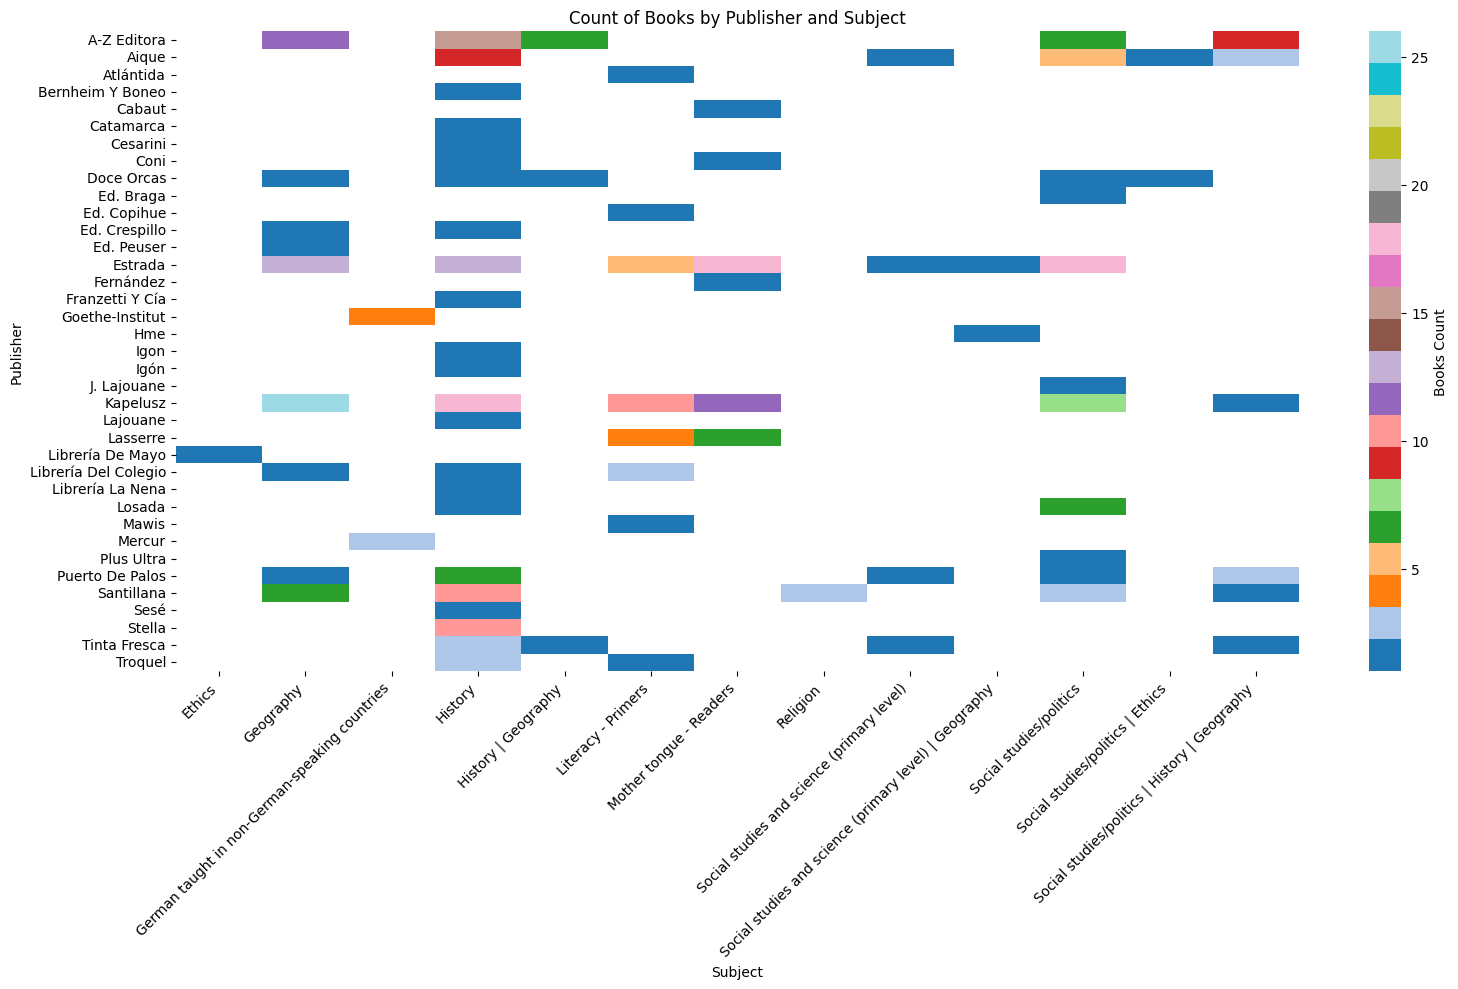

In [104]:
plt.figure(figsize=(16, 10))
ax = sns.heatmap(
    pd.crosstab(df['Publisher'], df['School Subject']),
    #cmap='PiYG',
    cmap='tab20',
    annot=False,
    fmt='d',
    linecolor='gray',
    cbar_kws={'label': 'Books Count'},
    mask=(pd.crosstab(df['Publisher'], df['School Subject']) <= 0)
)
plt.title('Count of Books by Publisher and Subject')
plt.xlabel('Subject')
plt.ylabel('Publisher')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# función de limpieza por celda
def clean_authors_cell(cell):
    if pd.isna(cell):
        return []
    # separar por '|' y limpiar espacios
    parts = [p.strip() for p in str(cell).split('|')]
    cleaned = []
    for p in parts:
        # 1) eliminar años o rangos tipo 1805 o 1805-1851
        p = re.sub(r'\b\d{3,4}(?:-\d{2,4})?\b', '', p)
        # 2) eliminar cualquier dígito restante
        p = re.sub(r'\d+', '', p)
        # 3) quitar puntuación sobrante al inicio/final (comas, barras, guiones, dos puntos, etc.)
        p = re.sub(r'^[\s\|\-,:;]+|[\s\|\-,:;]+$', '', p)
        # 4) normalizar espacios
        p = re.sub(r'\s{2,}', ' ', p).strip()
        if p:
            cleaned.append(p)
    return cleaned

# aplicar y dejar la lista limpia en una nueva columna
df['Authors'] = df['Authors'].apply(clean_authors_cell)

# (opcional) expandir cada autor en una fila separada para análisis posterior
#df_authors = df.explode('Authors_clean_list').rename(columns={'Authors_clean_list': 'Author'}).reset_index(drop=True)

# (opcional) contar frecuencias
#author_counts = df_authors['Author'].value_counts()

print(df.head())

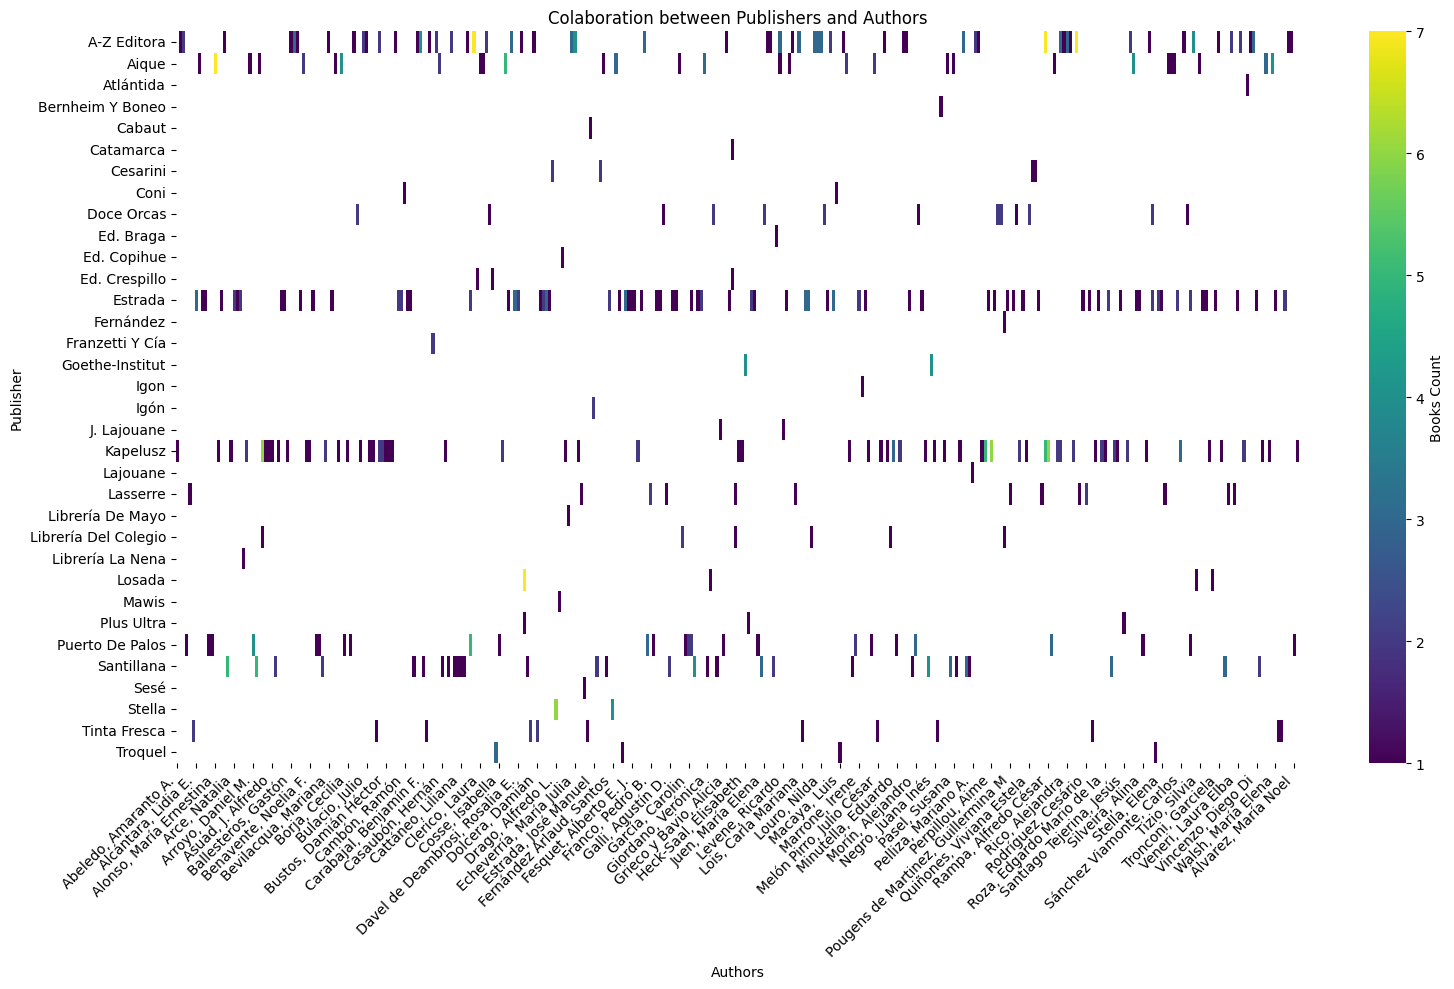

In [129]:
plt.figure(figsize=(16, 10))
(df
 .explode('Authors')
 .pipe(lambda d: sns.heatmap(
     pd.crosstab(d['Publisher'], d['Authors']),
     cmap='viridis',
     annot=False,
     fmt='d',
     linecolor='gray',
     cbar_kws={'label': 'Books Count'},
     mask=(pd.crosstab(d['Publisher'], d['Authors']) < 1)
 ))
)
plt.title('Colaboration between Publishers and Authors')
plt.xlabel('Authors')
plt.ylabel('Publisher')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [96]:
def clean_authors(authors):
    # Separar por '|'
    parts = str(authors).split('|')
    cleaned = []
    for p in parts:
        # Quitar números
        p = re.sub(r'\d+', '', p)
        # Quitar espacios extra
        p = p.strip()
        if p:  # solo agregar si no queda vacío
            cleaned.append(p)
    return cleaned

# Aplicar al DataFrame
df['Authors'] = df['Authors'].apply(clean_authors)
df.head(25)

,ID,Call Number,GLOTREC|Cat Link,Catalogue,Library Catalogue,Year,Publisher,Place,Title,Authors,Pages,Format,School Subject,Level of Education,Document Type,Country of Use
0,1026966108,"RA G-26(2,2016)1",gei1026966108,GEI,PPN=1026966108,2013,A-Z Editora,Ciudad Autónoma de Buenos Aires,Geografía de la Argentina María Julia Echeverr...,"[['Echeverría, María Julia', 'Capuz, Silvia Ma...","276 Seiten Illustrationen, Diagramme, Karten",Book,Geography,ISCED 3 - Upper secondary level,Textbook,Argentina
1,1026966620,"RA G-26(2,2016)4",gei1026966620,GEI,PPN=1026966620,2013,A-Z Editora,Ciudad Autónoma de Buenos Aires,Geografía del mundo actual María Julia Echever...,"[['Echeverría, María Julia', 'Capuz, Silvia Ma...","300 Seiten Illustrationen, Diagramme, Karten",Book,Geography,ISCED 3 - Upper secondary level,Textbook,Argentina
2,1026966876,"RA G-26(2,2014)5",gei1026966876,GEI,PPN=1026966876,2013,A-Z Editora,Ciudad Autónoma de Buenos Aires,Geografía social y económico de la Argentina M...,"[['Echeverría, María Julia', 'Capuz, Silvia Ma...","272 Seiten Illustrationen, Diagramme, Karten",Book,Geography,ISCED 3 - Upper secondary level,Textbook,Argentina
3,102697254X,"RA G-27(13,2016)1",gei102697254X,GEI,PPN=102697254X,2008,A-Z Editora,Ciudad Autónoma de Buenos Aires,Geografía - América y Antártida Horacio N. Lor...,"[['Lorenzini, Horacio N.', 'Balmaceda, Raúl Re...","222 Seiten Illustrationen, Diagramme, Karten",Book,Geography,ISCED 3 - Upper secondary level,Textbook,Argentina
4,1026973066,"RA G-27(11,2016)2",gei1026973066,GEI,PPN=1026973066,2006,A-Z Editora,Ciudad Autónoma de Buenos Aires,Geografía - Europa y Oceanía Horacio N. Lorenz...,"[['Lorenzini, Horacio N.', 'Balmaceda, Raúl Re...","258 Seiten Illustrationen, Diagramme, Karten",Book,Geography,ISCED 3 - Upper secondary level,Textbook,Argentina
5,1026973368,"RA G-27(11,2016)3",gei1026973368,GEI,PPN=1026973368,2005,A-Z Editora,Ciudad Autónoma de Buenos Aires,"Geografía general con aplicación en Asia, Áfri...","[['Lorenzini, Horacio N.', 'Balmaceda, Raúl Re...","247 Seiten Illustrationen, Diagramme, Karten",Book,Geography,ISCED 3 - Upper secondary level,Textbook,Argentina
6,1026974380,"RA G-28(1,98)8",gei1026974380,GEI,PPN=1026974380,1998,A-Z Editora,Buenos Aires,"Ciencias sociales - geografía EGB 3er ciclo 8,...","[['Louro, Nilda', 'Loray, María Julia']]","155 Seiten Illustrationen, Diagramme, Karten",Book,Geography,ISCED 2 - Lower secondary level,Textbook,Argentina
7,1026974453,"RA G-28(1,98)9",gei1026974453,GEI,PPN=1026974453,1998,A-Z Editora,Buenos Aires,"Ciencias sociales - geografía EGB 3er ciclo 9,...","[['Louro, Nilda', 'Loray, María Julia']]","117 Seiten Illustrationen, Diagramme, Karten",Book,Geography,ISCED 2 - Lower secondary level,Textbook,Argentina
8,1026974755,"RA H-57(2,98)8,1",gei1026974755,GEI,PPN=1026974755,1998,A-Z Editora,Buenos Aires,"Ciencias sociales - historia EGB 3er ciclo 8, ...","[['Cibotti, Ema']]","181 Seiten Illustrationen, Diagramme, Karten",Book,History,ISCED 2 - Lower secondary level,Textbook,Argentina
9,1026974909,"RA H-57(1,98)8,2",gei1026974909,GEI,PPN=1026974909,1998,A-Z Editora,Buenos Aires,"Ciencias sociales - historia EGB 3er ciclo 8, ...","[['Cibotti, Ema']]","158 Seiten Illustrationen, Diagramme, Karten",Book,History,ISCED 2 - Lower secondary level,Textbook,Argentina
